# Problem 6-3: Degree Correlations and Assortativity
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

In [4]:
import igraph as ig
import os
import sys

ModuleNotFoundError: No module named 'igraph._igraph'

#### Preprocessing and Reading Data

In [12]:
def process_and_open(name):
    with open(name) as file:
        lines = file.readlines()[2:]
        out = open('delete_this-' + name + '.temp', 'w')
        for l in lines:
            out.write(l)

    G = ig.Graph.Read_Ncol('delete_this/' + name + '.temp', directed=False)
    return G

In [13]:
adolescent = process_and_open('adolescent_health_network.txt').simplify()
jdk = process_and_open('JDK_dependency_network.txt').simplify()
openflights = process_and_open('openflights_network.txt').simplify()

# so we can do the same thing to all graphs without having to duplicate code
graphs = [adolescent, jdk, openflights]

NameError: name 'G' is not defined

#### Number of Nodes and Edges

In [15]:
for g in graphs:
    print(
        [k for k,v in locals().items() if v == g][0], ": ",  # the long mess gets the variable name
        g.vcount(), 'vertices,', g.ecount(), 'edges', sep='')

NameError: name 'graphs' is not defined

#### Assortativity Matrix

In [4]:
import numpy as np

In [5]:
def assortativity_matrix(g):
    #initiate square matrix with dimension = max degree of graph
    deg_max = max(g.degree())
    E = np.zeros((deg_max, deg_max))
    
    #go through all nodes and check the degree of each node's neighbor. 
    #and increase the corresponding matrix element by 1
    for v in g.vs:
        for n in g.neighbors(v.index):
            E[g.degree(v.index) - 1, g.degree(n) - 1] += 1
    
    #normalize matrix
    E /= np.sum(E)
    
    return E

In [6]:
E = [assortativity_matrix(g) for g in graphs]

In [7]:
import seaborn as sns
import matplotlib.pylab as plt

In [8]:
#from jupyterthemes import jtplot
#jtplot.style()

In [23]:
x = np.argmax(E[2], axis=0)
print(x, E[0].shape)

[ 1  1  2  2  1  2  3  1  1  3  0  0  3  1 25  1  1  1  1  2  1  1  0 74
  1  1  1  2  2  2  0  1  1  1  0 15  1  0 14  0  0 39 10 23  1  4 45  0
  0 29  0 15  3  0  0  2  0  1  1  4 50 16 23 22 15  4  1  2  4  3 23  0
 51  0  4  0  1 28 20  0  5  1  2  0 23  0  0 16  5  9 15  3  1  0  0  0
 23  0  2  7  0  0  0 35  1  4  1 16  0  0  0  5  0  1  0  4  4  3  2 59
  4 13 51  4  0  4  0  0  0  0  6  0  0  0  0  1  0  0  4  0  0  0 35  5
  0  0  0  0 20  0  0  0  0  0  0  0  0  0  1 10  0  0  0  0  0  9  0  5
  0  3  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35  0  0  0  0  0
  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 20] (27, 27)


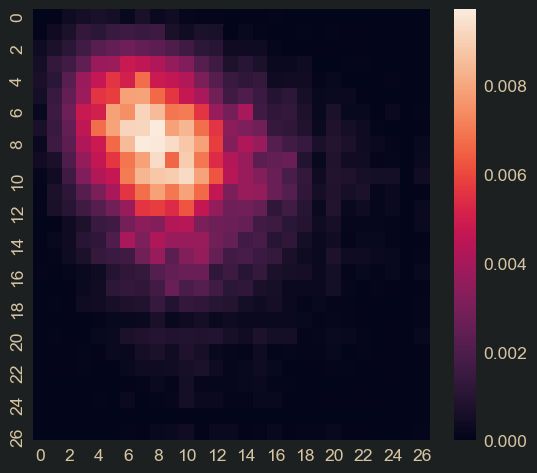

In [39]:
ax = sns.heatmap(E[0])
plt.show()

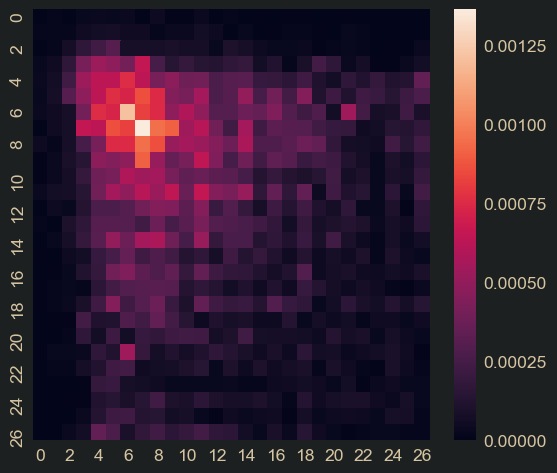

In [38]:
ax = sns.heatmap(E[1][:27,:27])
plt.show()

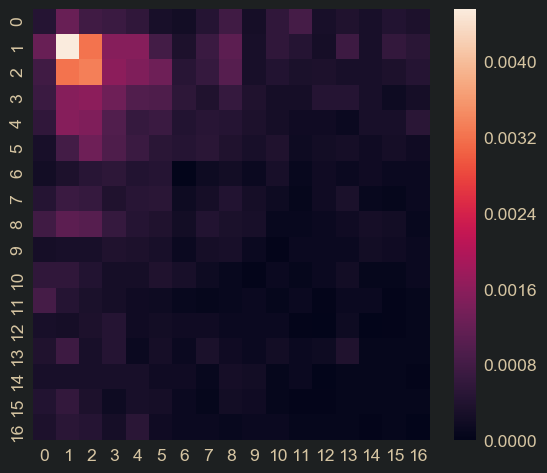

In [43]:
ax = sns.heatmap(E[2][:17, :17])
plt.show()

#### Average Degree of Neighbors

In [24]:
def knn(g, vertex):
    return np.mean([g.degree(n) for n in g.neighbors(vertex)])

In [25]:
def knn_averaged(g, deg):
    deg += 1
    #l = []
    #for v in g.vs:
    #    if g
    degs = np.array(g.degree())
    index = np.where(degs==deg)[0]
    
    knn_mean = np.mean([knn(g,i) for i in index])
    
    return knn_mean
    #return np.mean([knn(g, vertex) for vertex in g.vs if g.degree(vertex) == deg])

In [26]:
def scatter(g):
    plt.scatter(g.degree(), [knn(g, vertex) for vertex in g.vs], c='teal', s=5, marker=',', label='knn')
    plt.scatter(g.degree(), [knn_averaged(g, g.degree(vertex['name'])) for vertex in g.vs], c='r')
    plt.xscale("log")
    #plt.yscale("log")
    plt.show()

C:\Users\Lily\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Lily\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


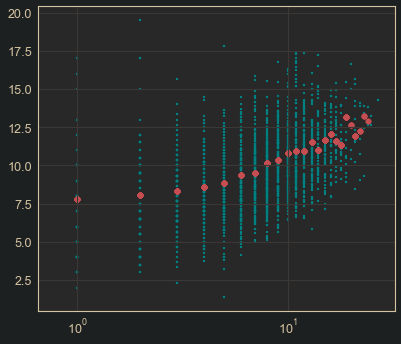

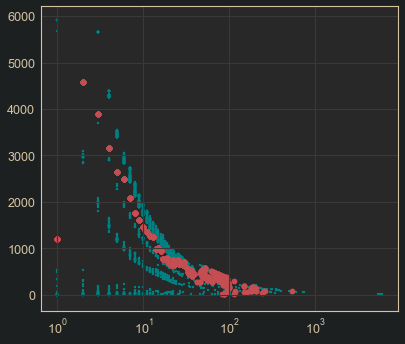

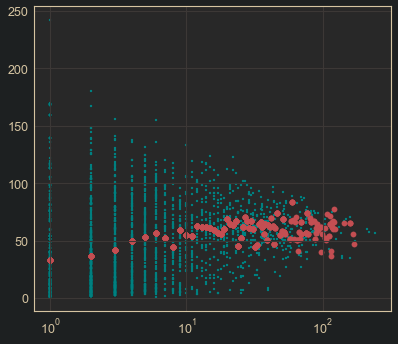

In [27]:
for g in graphs:
    scatter(g)

#### Degree Correlation Coefficient

In [17]:
def sigma(q, k):
    s1 = 0
    s2 = 0

    for i in range(k):
        s1 += (i+1)**2 * q[i] 
        s2 += (i+1)*q[i]
    return s1 - s2**2
    
def degree_correlation_coeff(E):
    '''
        takes assortativity matrix of a graph as an argument
    '''
    size = E.shape[0]
    q = [np.sum(E[i]) for i in range(size)]
    
    q = np.array(q)
    Q = q[:, np.newaxis]*q
    i = np.arange(1,size+1)
    I = i[:, np.newaxis]*i
    r = np.sum(I*(E-Q))
    return r/sigma(q,size)

In [18]:
R = [degree_correlation_coeff(e) for e in E]

In [19]:
print("Degree Correlation Coefficient of Each Graphs:")
print("-------------------------------------------------")
for i in range(3):
    print(
        [k for k,v in locals().items() if v == graphs[i]][0], ": ",  # the long mess gets the variable name
        R[i],
        sep='')

Degree Correlation Coefficient of Each Graphs:
-------------------------------------------------
adolescent: 0.2522525430884104
jdk: -0.2229706960177308
openflights: 0.04686705925649979
